# import Libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Read Dataset

In [5]:
# read the csv file
df = pd.read_csv(r'C:\Users\fagr\Desktop\ML_projects\DL\ANN\boston_houses\HousingData.csv')
# head of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


CRIM --> Per capita crime rate by town.

ZN --> Proportion of residential land zoned for lots over 25,000 sq. ft.

INDUS --> Proportion of non-retail business acres per town.

CHAS --> Charles River dummy variable (1 if tract bounds river; 0 otherwise).

NOX --> Nitric oxides concentration (parts per 10 million).

R --> Average number of rooms per dwelling.

AGE --> Proportion of owner-occupied units built prior to 1940.

DIS --> Weighted distances to five Boston employment centers.

RAD --> Index of accessibility to radial highways.

TAX --> Full-value property tax rate per $10,000.

PTRATIO --> Pupil-teacher ratio by town.

B --> 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town.

LSTAT --> Percentage of lower status of the population

MEDV --> It represents the median house price for each town.

In [6]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
# statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# EDA

In [9]:
# sum of nan values in each column
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

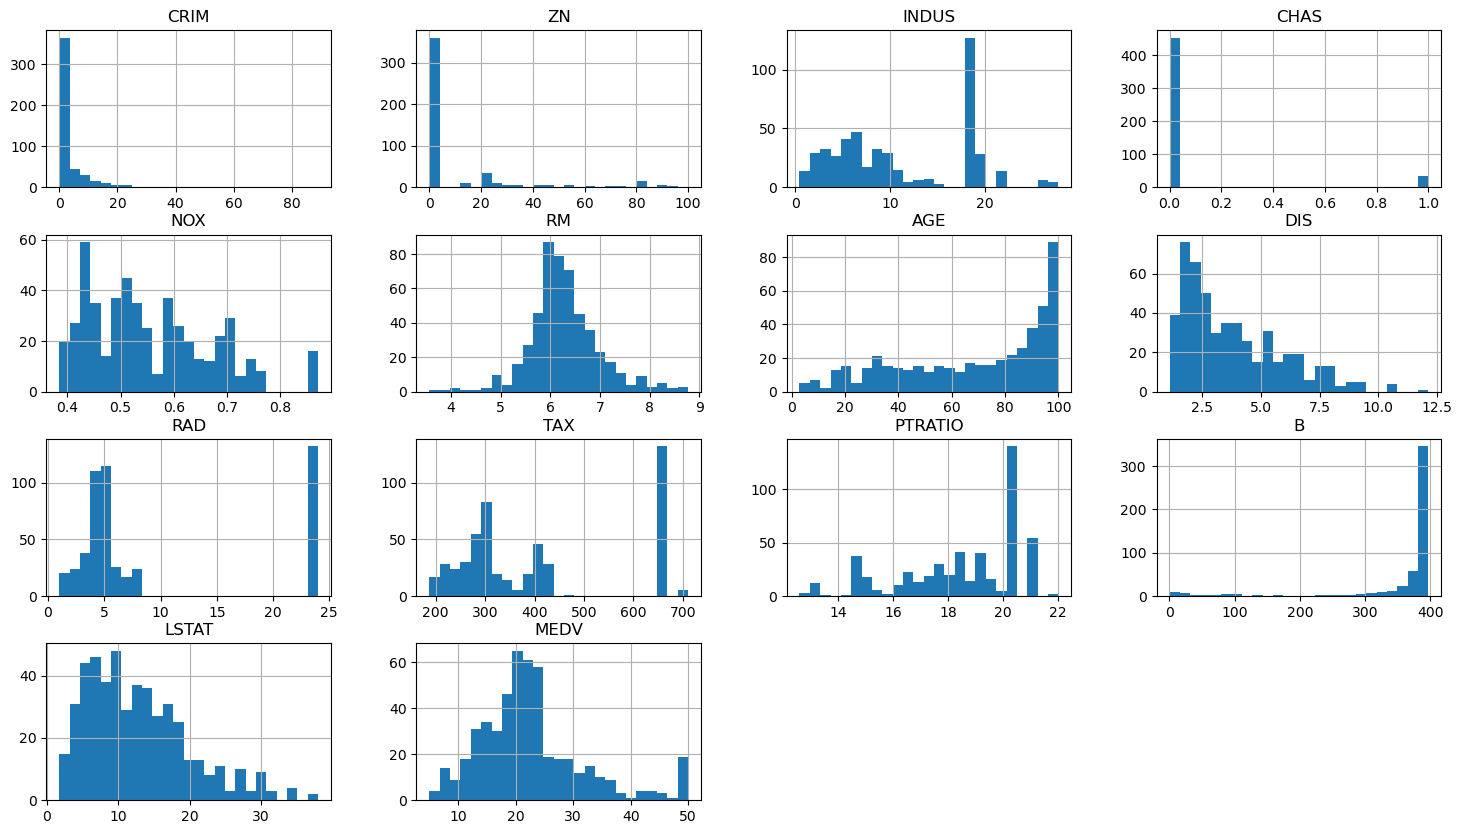

In [14]:
# histogram
df.hist(bins = 25 ,figsize = (18,10))
plt.show()

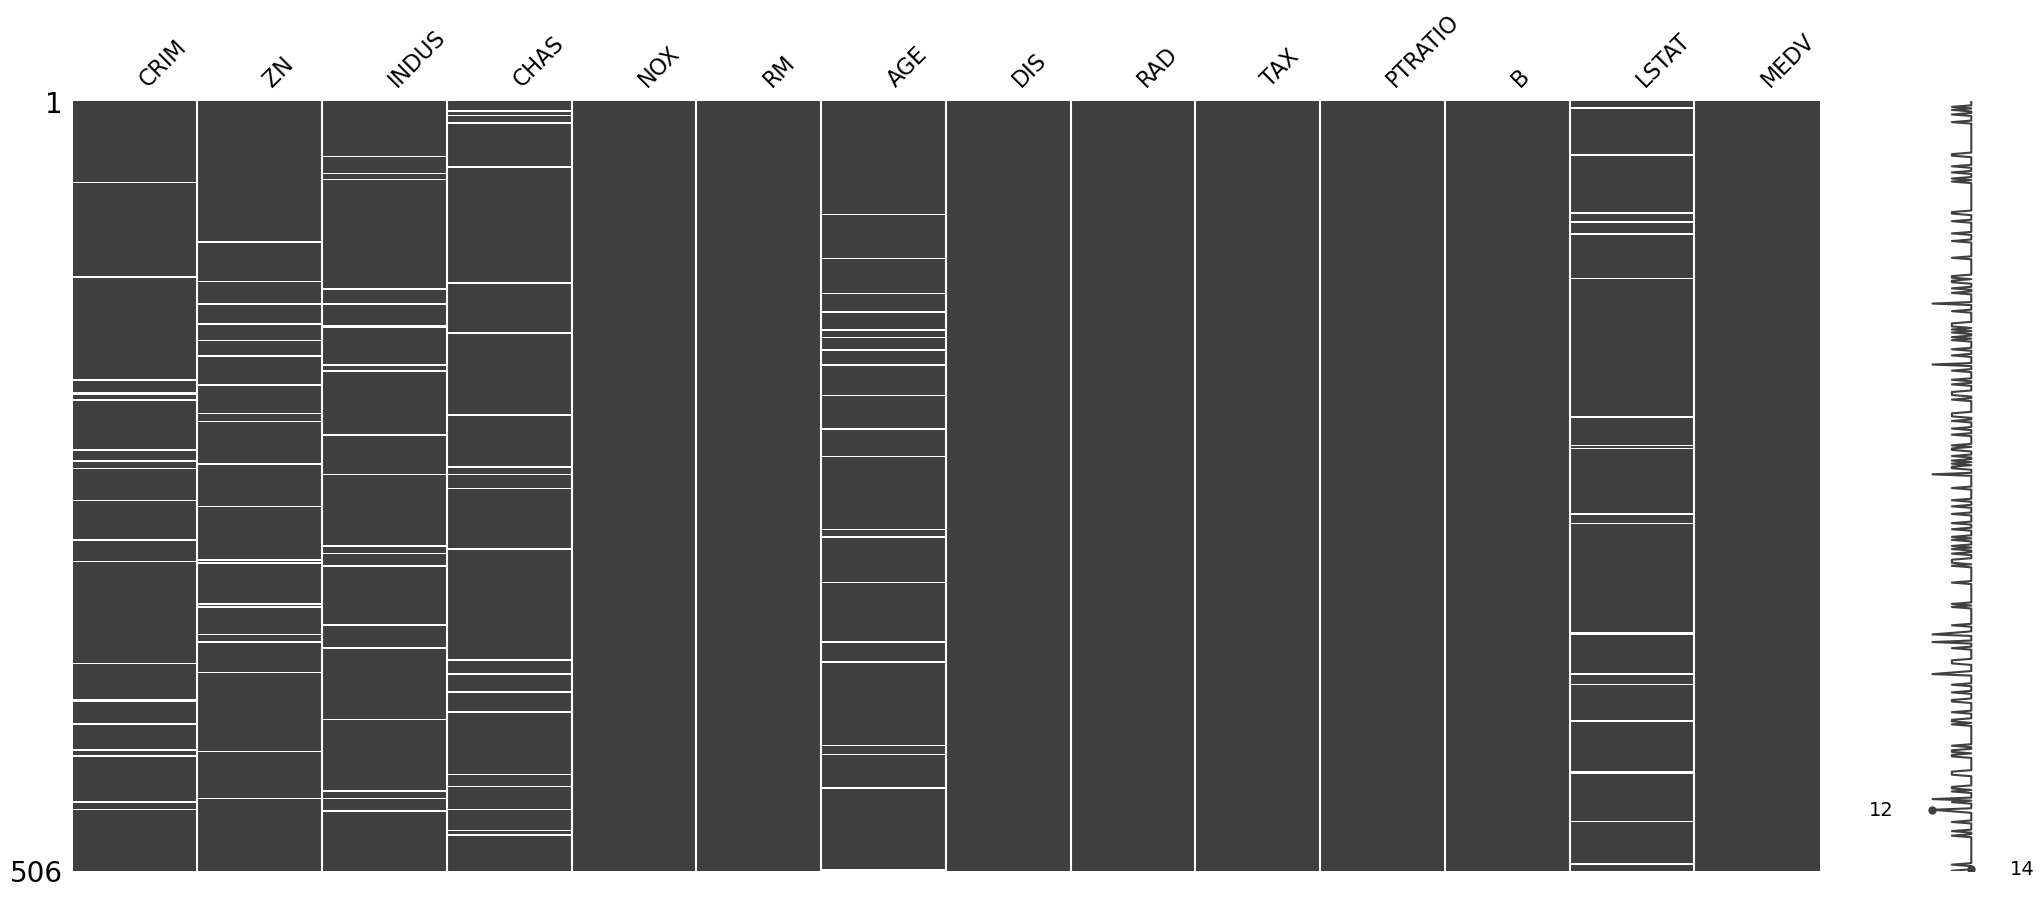

In [19]:
# check nulls using missingno
missingno.matrix(df)
plt.show()

In [20]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

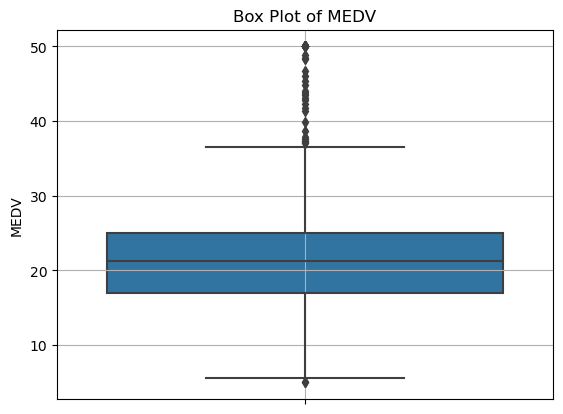

In [50]:
# Box plot for MEDV
sns.boxplot(y='MEDV', data=df)
plt.title('Box Plot of MEDV')
plt.grid()
plt.show()

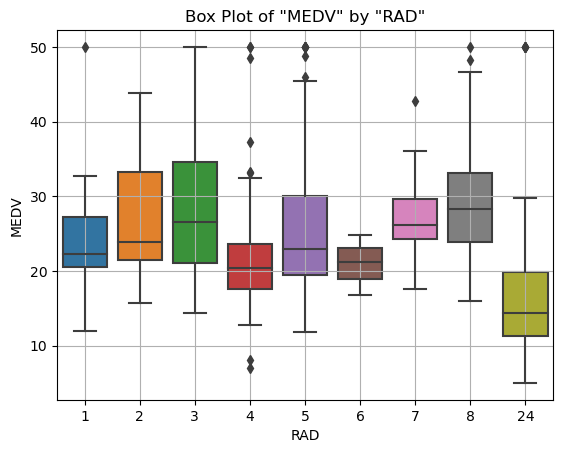

In [56]:
# Box plot for MEDV by RAD
sns.boxplot(y='MEDV', data=df ,x ='RAD')
plt.title('Box Plot of "MEDV" by "RAD"')
plt.grid()
plt.show()

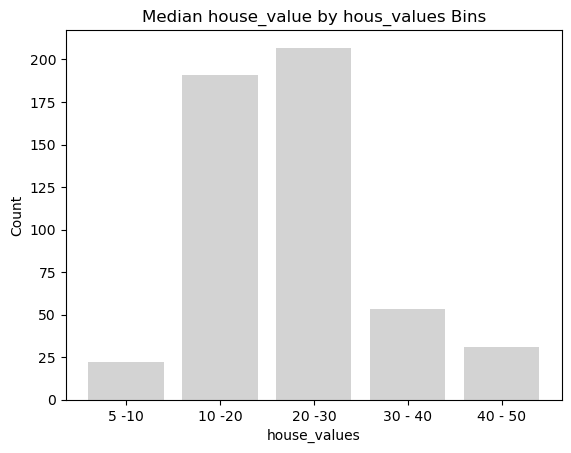

In [31]:
# divide MEDV into ranges
medv_bins = pd.cut(x = df['MEDV'] ,bins= [5 , 10 , 20 ,30 ,40 ,50 ] ,
      labels =[ '5 -10' ,'10 -20','20 -30' ,'30 - 40','40 - 50' ])
counts = medv_bins.value_counts().sort_index()
plt.bar(counts.index, height=counts , color = "lightgray")
plt.title('Median house_value by hous_values Bins')
plt.xlabel('house_values')
plt.ylabel('Count')  
plt.show()

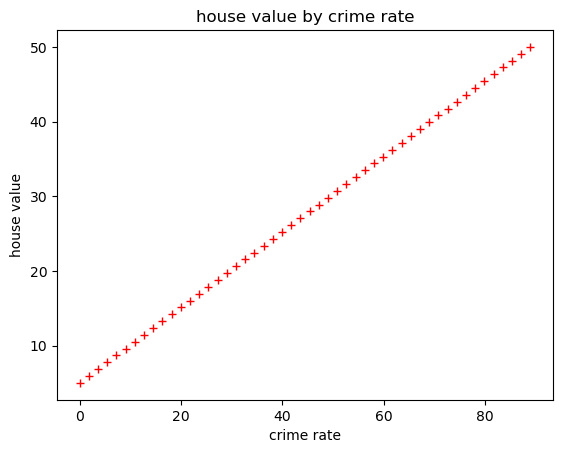

In [34]:
x = np.linspace(0 , 89 , 50)
y = np.linspace (5,50,50)
plt.plot(x,y,'r+')
plt.xlabel("crime rate")
plt.ylabel("house value")
plt.title("house value by crime rate")
plt.show()

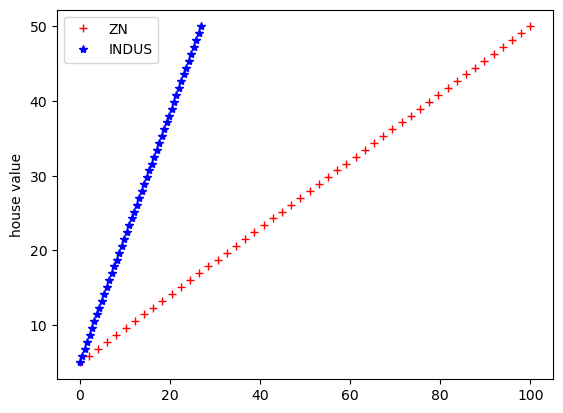

In [43]:
zn = np.linspace(0 ,100 ,50)
indus = np.linspace(0,27,50)
y = np.linspace(5 ,50 ,50)
plt.plot(zn,y,'r+' ,label = 'ZN')
plt.plot(indus ,y ,'b*' ,label = 'INDUS')
plt.legend()
plt.ylabel ("house value")
plt.show()

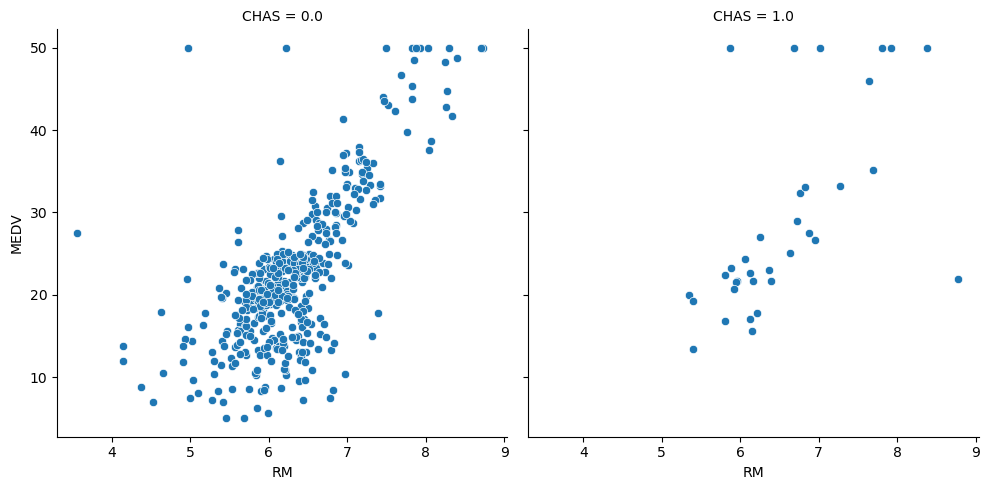

In [48]:
# scatter plot between "number of rooms" and "house value" by "CHAS"
sns.relplot(x = 'RM' ,y = 'MEDV' ,data =df ,col ='CHAS')
plt.show()

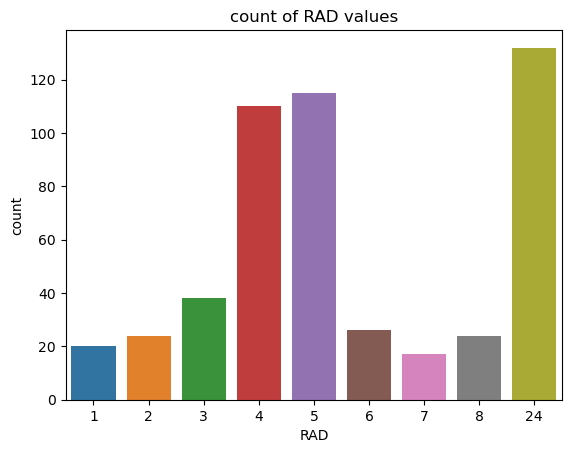

In [53]:
# count values in RAD column
sns.countplot(x = 'RAD' ,data =df)
plt.title("count of RAD values")
plt.show()

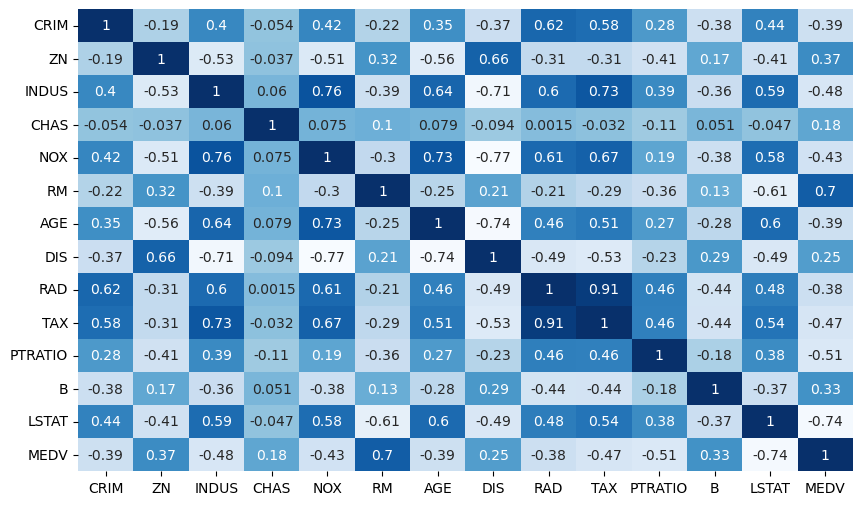

In [66]:
#heatmap
plt.figure(figsize =(10,6))
sns.heatmap(df.corr() , annot =True ,cbar = False , cmap ='Blues' )
plt.show()

# Split Data 

In [76]:
# drop duplicated data 
df = df.drop_duplicates()

In [77]:
# split to features & target
y = df['MEDV']
x = df.drop('MEDV' ,axis =1)

In [78]:
# split to train & test
x_train , x_test ,y_train ,y_test = train_test_split(x , y ,test_size = 0.15 ,random_state = 42 ,shuffle = True)

In [80]:
# split to train & validation
x_train ,x_valid , y_train, y_valid = train_test_split(x_train ,y_train ,test_size =0.15 ,random_state =42 ,shuffle = True)

# PIPLINE

In [87]:
pip = Pipeline(steps = [
    ('impute' , SimpleImputer(strategy = 'median')) ,
    ('scaler' , StandardScaler())
])

pip.fit(x_train)
x_train_final = pip.transform(x_train)
x_valid_final = pip.transform(x_valid)
x_test_final = pip.transform(x_test)

# ANN 

In [95]:
model = Sequential()

In [96]:
early_stopping = EarlyStopping(monitor = 'val_loss' , patience=5, restore_best_weights=True)
check_point =  ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

In [ ]:
model.add(Dense(26 ,input_shape = (13,) ,activation = 'relu'))
model.add(Dense(60 ,activation ='relu'))
model.add(Dense(100 ,activation = 'relu'))
model.add(Dense(60 ,activation = 'relu'))
model.add(Dense(1))

In [97]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error' ,metrics = ['mse'])

In [ ]:
model.fit(x_train_final ,y_train,validation_data =(x_valid_final ,y_valid ) ,epochs=100 
          ,batch_size = 20 ,callbacks = [early_stopping , check_point])

In [ ]:
loss ,mse = model.evaluate(x_train_final ,verbose =0)
print(mse)

In [ ]:
prediction = model.predict(x_test_final)

In [ ]:
model.evaluate(x_test_final)

In [ ]:
np.sqrt(mean_squared_error(y_test , prediction))

In [ ]:
prediction = pd.DataFrame(prediction , columns = ['y_pred'])
prediction['y_test'] = y_test.values.ravel()
prediction